<h1 style="color: #001a79;">Weekly Exercises</h1>

<hr style="border-top: 1px solid #001a79;" />

<h3 style="color: #001a79;">Exercise 3.1</h3>

<hr style="border-top: 1px solid #001a79;" />

__Task:__
<br>

Use numpy's polyfit to fit polynomials to the following two data sets.

Data Set 1:
```python
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
y = [1.3, 1.2, 9.4, 27.3, 63.1, 126.5, 217.3, 341.5, 512.8, 729.3, 1001.8, 1332.7, 1728.9, 2198.8, 2743.7, 3376.7]
```

Data Set 2:
```python
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
y = [5.7, 16.6, 58.0, 278.9, 1069.3, 3181.4, 7844.3, 16883.9, 32854.9, 59144.2, 100106.7, 161166.3, 248958.6]
```

Official documentation: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

The following code was adapted from: https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/03-parameters.ipynb

In [27]:
# For numerical arrrays.
import numpy as np

# For data visualization. 
import matplotlib.pyplot as plt

<br>

The numpy polyfit function takes 3 inputs - x, y and the polynomial degree - and it finds the best fitting curve for a given set of points by minimizing the sum of squares. 

Good article with explainations found here: https://www.pythonpool.com/numpy-polyfit/#:~:text=The%20function%20NumPy.,Y%2C%20and%20the%20polynomial%20degree

<br>

The goal is to take each of the two data sets and play around with the polynomial degree to see which degree would give the best fitting line. 

<br>

<h3 style="color: #001a79;">Data Set 1</h3>

IE WHAT IS THE BEST DEGREE TO PASS IN TO POLYFIT. 

WHAT DEGREE OF A POLYNOMINAL IS GOOD FOR A DATA SET??????

GENERAL FEELING THAT LOWER IS BETTER. ITS LESS COMPLEX. BETTER OFF WITH LOWER DEGREE IF YOU CAN GET AWAY WITH IT. 

MIGHT FIT MORE WITH THE NOISE WHICH IS THE DOWN SIDE. 

In [48]:
# DATA SET #1
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0])
y = np.array([1.3, 1.2, 9.4, 27.3, 63.1, 126.5, 217.3, 341.5, 512.8, 729.3, 1001.8, 1332.7, 1728.9, 2198.8, 2743.7, 3376.7])

<h5 style="color: #001a79;">Polynominal Degree of 1</h5>

First I am going to pass in a degree of 1. It's important to note that 1 is the lowest degree which can be passed into this funciton. I was curious so I trialed it using zero and a negative number. It didn't work so I've gone with 1!

In [49]:
# Use x and y to try to find the original parameters.
params = np.polyfit(x, y, 1)
params

array([ 206.84161765, -650.54338235])

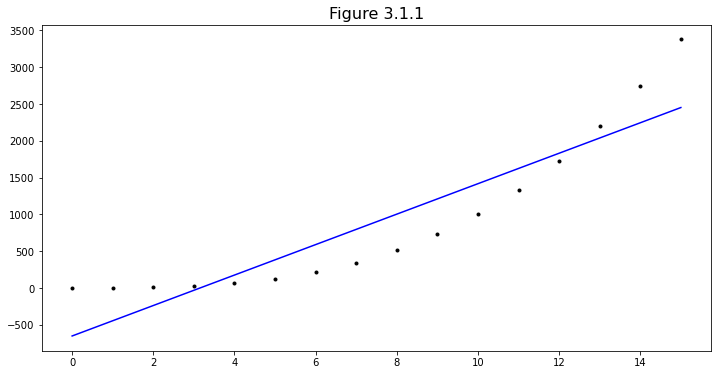

In [50]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot x vs y.
ax.plot(x, y, 'k.')

# Plot x vs parameters on x.
ax.plot(x, params[0] * x + params[1], 'b-')

plt.title("Figure 3.1.1", size=16)
plt.show()

Okay so we can see here in Figure 3.1.1 that the white noise has a curve to it and there is a straight line showing linear regression which is close enough but not very convincing that it would be the best fitting line for this data set. Therefore, I am ruling out a degree of 1 as a parameter.

<h5 style="color: #001a79;">Polynominal Degree of 2</h5>

In [51]:
# Use x and y to try to find the original parameters.
params = np.polyfit(x, y, 2)
params

array([  22.51017157, -130.81095588,  137.31262255])

Numpy polyval is a useful method which returns the polynominal of specific values. This is useful when working with arrays of multiple values which as we can see from the output of the previous cell we now have 3 values. 

We could also do this manually which I have included in comments below, however, to allow for simplicity I am making use of this convienent method.

Offical documentation can be found here: https://numpy.org/doc/stable/reference/generated/numpy.polyval.html

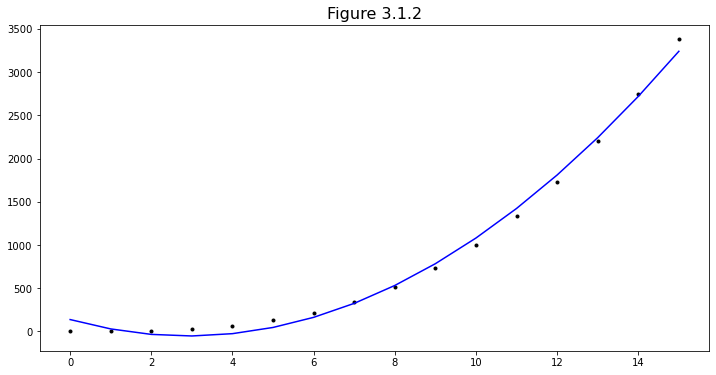

In [52]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot x vs y.
ax.plot(x, y, 'k.')

# Plot x vs parameters on x.
#ax.plot(x, params[0] * x**2 + params[1] * x + params[2], 'b-')
ax.plot(x, np.polyval(params, x), 'b-')

plt.title("Figure 3.1.2", size=16)
plt.show()

Okay so Figure 3.1.2 is far more convincing that than 3.1.1. We can see a quadratic polynominal line which is very close to the white noise meeting at various instances. A degree of 2 is definately a better choice than a degree of 1. 

I wonder if another degree up would produce even better results? 

<h5 style="color: #001a79;">Polynominal Degree of 3</h5>

In [53]:
# Use x and y to try to find the original parameters.
params = np.polyfit(x, y, 3)
params

array([ 0.99699366,  0.07781416, -0.50388419,  1.22298762])

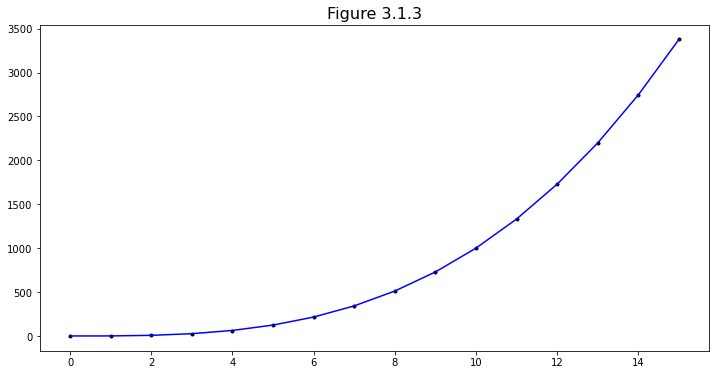

In [54]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot x vs y.
ax.plot(x, y, 'k.')

# Plot x vs parameters on x.
ax.plot(x, np.polyval(params, x), 'b-')

plt.title("Figure 3.1.3", size=16)
plt.show()

A clear improvement in Figure 3.1.3. The a cubic polynomial line is meeting the noise at almost every point. However, I am wondering if the noise is beginning to interfere with the polynominal data?

<h5 style="color: #001a79;">Polynominal Degree of 9</h5>

I am testing my theory here using a degree of 9.

In [60]:
# Use x and y to try to find the original parameters.
params = np.polyfit(x, y, 9)
params

array([-6.83370168e-07,  4.72646987e-05, -1.35534810e-03,  2.08874383e-02,
       -1.87604053e-01,  9.96148925e-01, -2.02376342e+00,  4.78430908e+00,
       -3.28945161e+00,  1.24286075e+00])

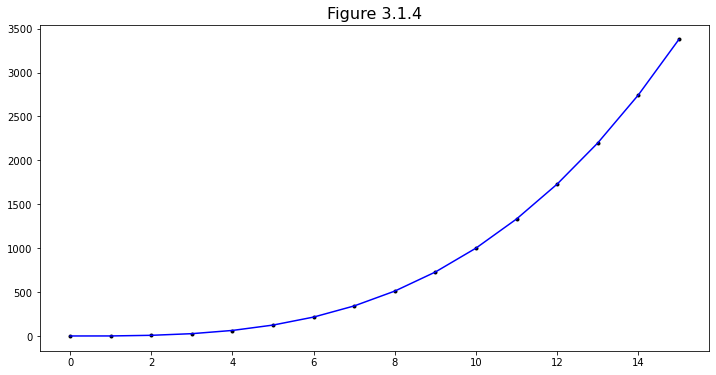

In [61]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot x vs y.
ax.plot(x, y, 'k.')

# Plot x vs parameters on x.
ax.plot(x, np.polyval(params, x), 'b-')

plt.title("Figure 3.1.4", size=16)
plt.show()

Okay so using a degree of 9 appears to give a similar fit to when I used a degree of 3. I am worried that the white noise is impacting my results. The line fits perfectly but is it too perfect? Is it realistic? 

<h4 style="color: #001a79;">Conclusion</h4>



For Data Set 1 I believe using a polynominal degree of 2 or 3 is best. I would go with a degree of 3. It met the noise on almost every point giving us the best fit line for this data set. I tried it with a degree of 9 which appeared to also give a best fit line which leads me to believe that the higher the degree the better the fit. However, I have concerns which were confirmed by a Wikipedia article found here: https://en.wikipedia.org/wiki/Curve_fitting

This article suggests that a higher degree is undesirable as an exact match might not exist and you run the risk of distorting the data points. Therefore, using a lower degree would is a preferred option to get the best fitting line of a data set. 

<br>

<hr style="border-top: 1px solid #001a79;" />

<br>

<h3 style="color: #001a79;">Data Set 2</h3>

In [9]:
# DATA SET #2
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
y = np.array([5.7, 16.6, 58.0, 278.9, 1069.3, 3181.4, 7844.3, 16883.9, 32854.9, 59144.2, 100106.7, 161166.3, 248958.6])

In [10]:
# Use x and y to try to find the original parameters.
params = np.polyfit(x, y, 1)
params

array([ 16228.18846154, -48786.91538462])

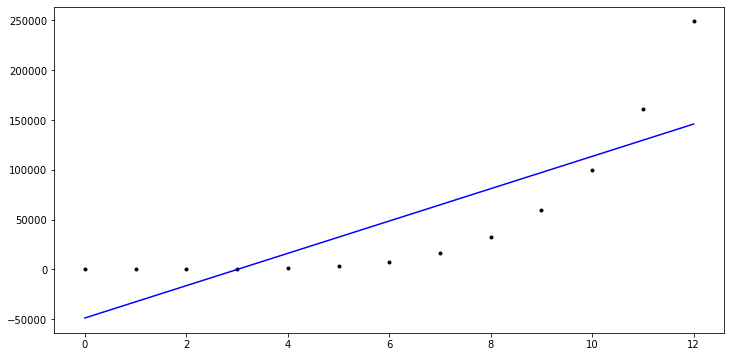

In [11]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot x vs y.
ax.plot(x, y, 'k.')

# Plot x vs parameters on x.
ax.plot(x, params[0] * x + params[1], 'b-')

Again slight curve but not a hundred miles from noise. 

<br>

Now lets change the parameter. 

<br>

In [12]:
# Use x and y to try to find the original parameters.
params = np.polyfit(x, y, 2)
params

array([  3218.5461039 , -22394.36478521,  22021.0989011 ])

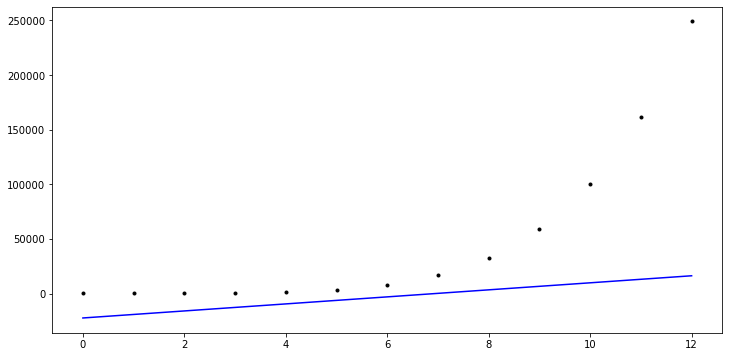

In [13]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot x vs y.
ax.plot(x, y, 'k.')

# Plot x vs parameters on x.
ax.plot(x, params[0] * x + params[1], 'b-')

and again totally different sort of curve. 

<br>

Now lets change the parameter. 

<br>

In [14]:
# Use x and y to try to find the original parameters.
params = np.polyfit(x, y, 3)
params

array([  404.99944639, -4071.44393107, 11220.5892649 , -4708.86456044])

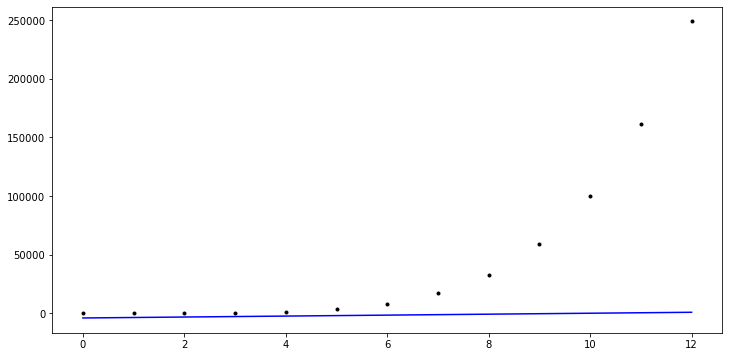

In [15]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot x vs y.
ax.plot(x, y, 'k.')

# Plot x vs parameters on x.
ax.plot(x, params[0] * x + params[1], 'b-')

<hr style="border-top: 1px solid #001a79;" />
<br>
<h3 style="color: #001a79;">Exercise 3.2</h3>
<hr style="border-top: 1px solid #001a79;" />

__Task:__
<br>

<hr style="border-top: 1px solid #001a79;" />

<h3 style="color: #001a79;">End</h3>